In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999

In [2]:
train = pd.read_csv('../final_project/train_data.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Filling missing values of categorical features with mode
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

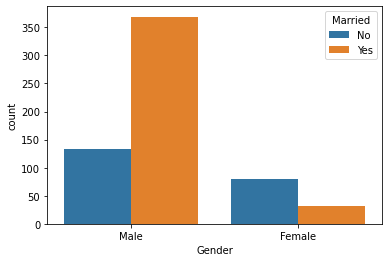

In [4]:
#Exploratory Data Analysis
sns.countplot(x = 'Gender', hue="Married", data=train)

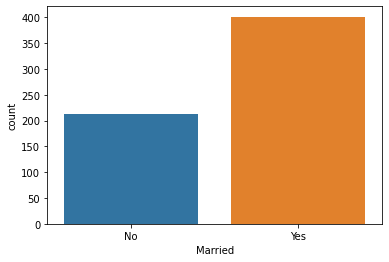

In [5]:
sns.countplot(train['Married'])

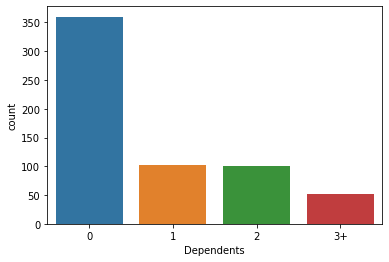

In [6]:
sns.countplot(train['Dependents'])

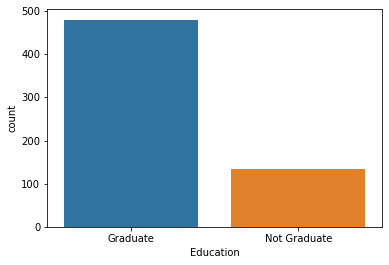

In [7]:
sns.countplot(train['Education'])

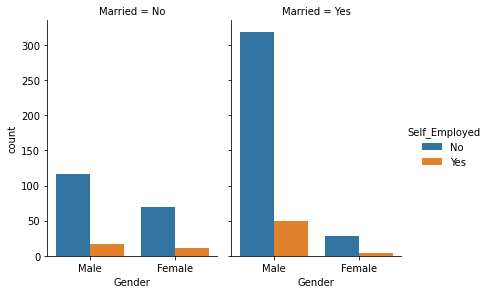

In [8]:
sns.catplot(x="Gender", hue="Self_Employed", col="Married",
                data=train, kind="count",
                height=4, aspect=.7);

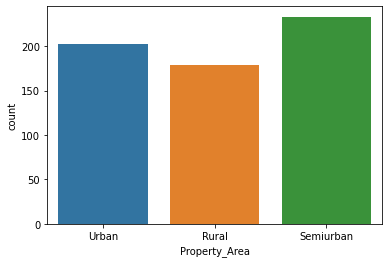

In [9]:
sns.countplot(train['Property_Area'])

Text(0.5, 1.0, 'Frequency of loan approval status based on Property Area')

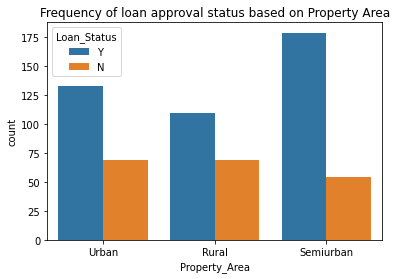

In [10]:
sns.countplot(x = 'Property_Area', hue="Loan_Status", data=train)
plt.title('Frequency of loan approval status based on Property Area')

In [11]:
# Numerical and Categorical features
numerical_features = []
categorical_features = []
drop_features = []

for col in train.columns:
    if train.dtypes[col] == 'object':
        categorical_features.append(col)
    else:
        numerical_features.append(col)

print(numerical_features)
print(categorical_features)
drop_features.append('Loan_ID')

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [12]:
# Dist plot for Numerical features
# fig,ax=plt.subplots(len(numerical_features), figsize=(10,30))
# plt.subplots_adjust(hspace = 0.8)
# for index,col in enumerate(numerical_features):
#     sns.distplot(loans[col], ax=ax[index])


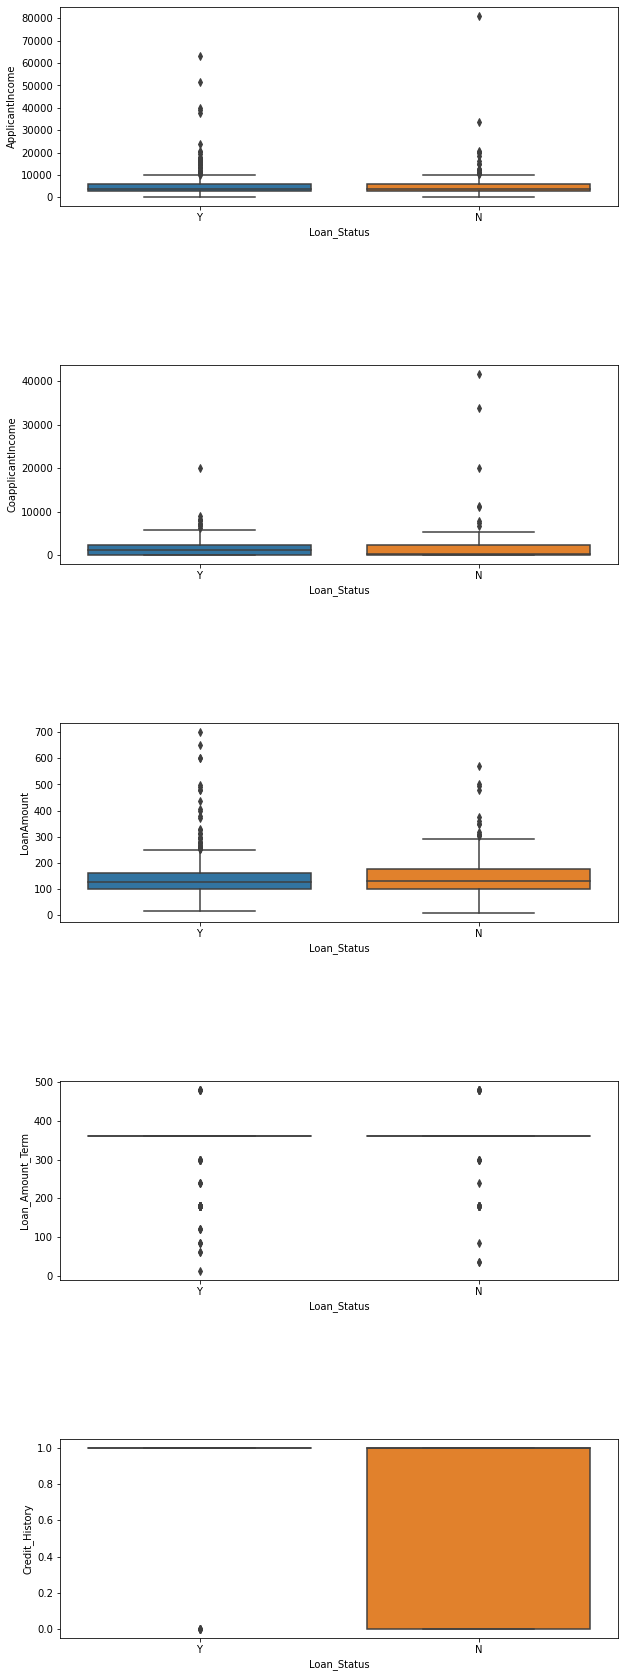

In [13]:
# Outlier Detection
# A boxplot is used below to analyze the relationship between a categorical feature and a continuous feature
fig,ax=plt.subplots(len(numerical_features), figsize=(10,30))
plt.subplots_adjust(hspace = 0.8)
for index,col in enumerate(numerical_features):
    sns.boxplot(data=train, y=col, x="Loan_Status", orient="v", ax=ax[index])

In [14]:
#Create new columns 
numerical_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [15]:
# Concatenate total incomes
train['Total_Income'] =train['ApplicantIncome'] + train['CoapplicantIncome']

In [16]:
# drop_features.append('ApplicantIncome')
# drop_features.append('CoapplicantIncome')

In [17]:
# # Apply log transformation for right skewed columns
# loans['ApplicantIncomeLog'] = np.log(loans['ApplicantIncome'])
# drop_features.append('ApplicantIncome')
# sns.distplot(loans['ApplicantIncomeLog'])

In [20]:
train.isnull().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [22]:
train['CoapplicantIncome'].value_counts()

0.0       273
1666.0      5
2083.0      5
2500.0      5
1750.0      3
         ... 
7166.0      1
2138.0      1
2166.0      1
3541.0      1
3021.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [ ]:
print(len(loans[loans['CoapplicantIncome'].isnull()]))

In [ ]:
# loans['CoapplicantIncomeLog'] = np.log(loans['CoapplicantIncome'])

In [ ]:
# drop_features.append('CoapplicantIncome')

In [ ]:
# loans['Loan_Amount_Term_log'] = np.log(loans['Loan_Amount_Term'])
# drop_features.append('Loan_Amount_Term')
# sns.distplot(loans['Loan_Amount_Term_log'])

In [23]:
test_data = pd.read_csv('../final_project/test_result.csv')

In [24]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
test_data['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
test_data['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
test_data['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
test_data['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())
test_data['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
test_data['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())

In [26]:
# Concatenate both train and test data set
total_data = pd.concat([train, test_data])

In [27]:
total_data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
362,LP002971,Male,Yes,0,Not Graduate,No,4009,1777.0,130.0,360.0,1.000000,Urban,Y,NaN
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,95.0,300.0,0.842199,Urban,Y,NaN
364,LP002980,Male,No,0,Graduate,Yes,3250,1993.0,141.0,360.0,1.000000,Semiurban,Y,NaN
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,133.0,360.0,1.000000,Rural,Y,NaN
366,LP002989,Male,No,0,Graduate,No,9200,0.0,96.0,480.0,1.000000,Rural,Y,NaN


In [28]:
total_data.reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.000000,Urban,Y,5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.000000,Rural,N,6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.000000,Urban,Y,3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.000000,Urban,Y,4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.000000,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,362,LP002971,Male,Yes,0,Not Graduate,No,4009,1777.0,130.0,360.0,1.000000,Urban,Y,NaN
977,363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,95.0,300.0,0.842199,Urban,Y,NaN
978,364,LP002980,Male,No,0,Graduate,Yes,3250,1993.0,141.0,360.0,1.000000,Semiurban,Y,NaN
979,365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,133.0,360.0,1.000000,Rural,Y,NaN


In [29]:
total_data_num = pd.get_dummies(data=total_data, columns=categorical_features, drop_first=True)
total_data_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,Loan_ID_LP001014,Loan_ID_LP001015,Loan_ID_LP001018,Loan_ID_LP001020,Loan_ID_LP001022,Loan_ID_LP001024,Loan_ID_LP001027,Loan_ID_LP001028,Loan_ID_LP001029,Loan_ID_LP001030,Loan_ID_LP001031,Loan_ID_LP001032,Loan_ID_LP001034,Loan_ID_LP001035,Loan_ID_LP001036,Loan_ID_LP001038,Loan_ID_LP001041,Loan_ID_LP001043,Loan_ID_LP001046,Loan_ID_LP001047,Loan_ID_LP001050,Loan_ID_LP001051,Loan_ID_LP001052,Loan_ID_LP001054,Loan_ID_LP001055,Loan_ID_LP001056,Loan_ID_LP001059,Loan_ID_LP001066,Loan_ID_LP001067,Loan_ID_LP001068,Loan_ID_LP001073,Loan_ID_LP001078,Loan_ID_LP001082,Loan_ID_LP001083,Loan_ID_LP001086,Loan_ID_LP001087,Loan_ID_LP001091,Loan_ID_LP001094,Loan_ID_LP001095,Loan_ID_LP001096,Loan_ID_LP001097,Loan_ID_LP001098,Loan_ID_LP001099,Loan_ID_LP001100,Loan_ID_LP001105,Loan_ID_LP001106,Loan_ID_LP001107,Loan_ID_LP001108,Loan_ID_LP001109,Loan_ID_LP001112,Loan_ID_LP001114,Loan_ID_LP001115,Loan_ID_LP001116,Loan_ID_LP001119,Loan_ID_LP001120,Loan_ID_LP001121,Loan_ID_LP001123,Loan_ID_LP001124,Loan_ID_LP001128,Loan_ID_LP001131,Loan_ID_LP001135,Loan_ID_LP001136,Loan_ID_LP001137,Loan_ID_LP001138,Loan_ID_LP001144,Loan_ID_LP001146,Loan_ID_LP001149,Loan_ID_LP001151,Loan_ID_LP001153,Loan_ID_LP001155,Loan_ID_LP001157,Loan_ID_LP001163,Loan_ID_LP001164,Loan_ID_LP001169,Loan_ID_LP001174,Loan_ID_LP001176,Loan_ID_LP001177,Loan_ID_LP001179,Loan_ID_LP001183,Loan_ID_LP001185,Loan_ID_LP001186,Loan_ID_LP001187,Loan_ID_LP001190,Loan_ID_LP001194,Loan_ID_LP001195,Loan_ID_LP001197,Loan_ID_LP001198,Loan_ID_LP001199,Loan_ID_LP001203,Loan_ID_LP001205,Loan_ID_LP001206,Loan_ID_LP001207,Loan_ID_LP001208,Loan_ID_LP001210,Loan_ID_LP001211,Loan_ID_LP001213,Loan_ID_LP001219,Loan_ID_LP001220,Loan_ID_LP001221,Loan_ID_LP001222,Loan_ID_LP001225,Loan_ID_LP001226,Loan_ID_LP001228,Loan_ID_LP001230,Loan_ID_LP001231,Loan_ID_LP001232,Loan_ID_LP001233,Loan_ID_LP001237,Loan_ID_LP001238,Loan_ID_LP001241,Loan_ID_LP001242,Loan_ID_LP001243,Loan_ID_LP001245,Loan_ID_LP001248,Loan_ID_LP001250,Loan_ID_LP001253,Loan_ID_LP001255,Loan_ID_LP001256,Loan_ID_LP001259,Loan_ID_LP001263,Loan_ID_LP001264,Loan_ID_LP001265,Loan_ID_LP001266,Loan_ID_LP001267,Loan_ID_LP001268,Loan_ID_LP001270,Loan_ID_LP001273,Loan_ID_LP001275,Loan_ID_LP001279,Loan_ID_LP001280,Loan_ID_LP001282,Loan_ID_LP001284,Loan_ID_LP001287,Loan_ID_LP001289,Loan_ID_LP001291,Loan_ID_LP001298,Loan_ID_LP001310,Loan_ID_LP001312,Loan_ID_LP001313,Loan_ID_LP001316,Loan_ID_LP001317,Loan_ID_LP001318,Loan_ID_LP001319,Loan_ID_LP001321,Loan_ID_LP001322,Loan_ID_LP001323,Loan_ID_LP001324,Loan_ID_LP001325,Loan_ID_LP001326,Loan_ID_LP001327,Loan_ID_LP001332,Loan_ID_LP001333,Loan_ID_LP001334,Loan_ID_LP001335,Loan_ID_LP001338,Loan_ID_LP001343,Loan_ID_LP001345,Loan_ID_LP001347,Loan_ID_LP001348,Loan_ID_LP001349,Loan_ID_LP001350,Loan_ID_LP001351,Loan_ID_LP001352,Loan_ID_LP001356,Loan_ID_LP001357,Loan_ID_LP001358,Loan_ID_LP001359,Loan_ID_LP001361,Loan_ID_LP001366,Loan_ID_LP001367,Loan_ID_LP001368,Loan_ID_LP001369,Loan_ID_LP001370,Loan_ID_LP001375,Loan_ID_LP001379,Loan_ID_LP001380,Loan_ID_LP001384,Loan_ID_LP001385,Loan_ID_LP001386,Loan_ID_LP001387,Loan_ID_LP001391,Loan_ID_LP001392,Loan_ID_LP001398,Loan_ID_LP001400,Loan_ID_LP001401,Loan_ID_LP001404,Loan_ID_LP001405,Loan_ID_LP001407,Loan_ID_LP001413,Loan_ID_LP001415,Loan_ID_LP001419,Loan_ID_LP001420,Loan_ID_LP001421,Loan_ID_LP001422,Loan_ID_LP001426,Loan_ID_LP001428,Loan_ID_LP001430,Loan_ID_LP001431,Loan_ID_LP001432,Loan_ID_LP001439,Loan_ID_LP001443,Loan_ID_LP001445,Loan_ID_LP001446,Loan_ID_LP001448,Loan_ID_LP001449,Loan_ID_LP001450,Loan_ID_LP001451,Loan_ID_LP001452,Loan_ID_LP001455,Loan_ID_LP001465,Loan_ID_LP001466,Loan_ID_LP001469,Loan_ID_LP001471,Loan_ID_LP001472,Loan_ID_LP001473,Loan_ID_LP001475,Loan_ID_LP001478,Loan_ID_LP001482,Loan_ID_LP001483,Loan_ID_LP001486,Loan_ID_LP001487,Loan_ID_LP001488,Loan_ID_LP001489,Loan_ID_LP001490

In [30]:
target = total_data_num["Loan_Status_Y"]
#  target_names = ["negative", "positive"]

target

0      1
1      0
2      1
3      1
4      1
      ..
362    1
363    1
364    1
365    1
366    1
Name: Loan_Status_Y, Length: 981, dtype: uint8

In [31]:
data = total_data_num.drop("Loan_Status_Y", axis=1)
data

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
362             4009             1777.0       130.0             360.0   
363             4158              709.0        95.0             300.0   
364             3250             1993.0       141.0             360.0   
365             5000             2393.0       133.0             360.0   
366             9200                0.0        96.0             480.0   

     Credit_History  Total_Income  Loan_ID_LP001003  Loan_ID_LP001005  \
0          1.000000        5849.0                 0                 0   
1          1.000000        6091.0                 1                 0   
2          1.000000        3000.0                 0                 1   
3          1.000000        4941.0                 0                 0   
4          1.000000        6000.0                 0                 0   
..              ...           ...               ...               ...   
362        1.000000           NaN                 0                 0   
363        0.842199           NaN                 0                 0   
364        1.000000           NaN                 0                 0   
365        1.000000           NaN                 0                 0   
366        1.000000           NaN                 0                 0   

     Loan_ID_LP001006  Loan_ID_LP001008  Loan_ID_LP001011  Loan_ID_LP001013  \
0                   0                 0                 0                 0   
1                   0                 0                 0                 0   
2                   0                 0                 0                 0   
3                   1                 0                 0                 0   
4                   0                 1                 0                 0   
..                ...               ...               ...               ...   
362                 0                 0                 0                 0   
363                 0                 0                 0                 0   
364                 0                 0                 0                 0   
365                 0                 0                 0                 0   
366                 0                 0                 0                 0   

     Loan_ID_LP001014  Loan_ID_LP001015  Loan_ID_LP001018  Loan_ID_LP001020  \
0                   0                 0                 0                 0   
1                   0                 0                 0                 0   
2                   0                 0                 0                 0   
3                   0                 0                 0                 0   
4                   0                 0                 0                 0   
..                ...               ...               ...               ...   
362                 0                 0                 0                 0   
363                 0                 0                 0                 0   
364                 0                 0                 0                 0   
365                 0                 0                 0                 0   
366                 0                 0                 0                 0   

     Loan_ID_LP001022  Loan_ID_LP001024  Loan_ID_LP001027  Loan_ID_LP001028  \
0                   0                 0                 0                 0   
1                   0                 0                 0                 0   
2                   0                 0                 0                 0   
3                   0                

In [32]:
data = data.dropna()
data


ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
5               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Total_Income  Loan_ID_LP001003  Loan_ID_LP001005  \
1               1.0        6091.0                 1                 0   
2               1.0        3000.0                 0                 1   
3               1.0        4941.0                 0                 0   
4               1.0        6000.0                 0                 0   
5               1.0        9613.0                 0                 0   
..              ...           ...               ...               ...   
609             1.0        2900.0                 0                 0   
610             1.0        4106.0                 0                 0   
611             1.0        8312.0                 0                 0   
612             1.0        7583.0                 0                 0   
613             0.0        4583.0                 0                 0   

     Loan_ID_LP001006  Loan_ID_LP001008  Loan_ID_LP001011  Loan_ID_LP001013  \
1                   0                 0                 0                 0   
2                   0                 0                 0                 0   
3                   1                 0                 0                 0   
4                   0                 1                 0                 0   
5                   0                 0                 1                 0   
..                ...               ...               ...               ...   
609                 0                 0                 0                 0   
610                 0                 0                 0                 0   
611                 0                 0                 0                 0   
612                 0                 0                 0                 0   
613                 0                 0                 0                 0   

     Loan_ID_LP001014  Loan_ID_LP001015  Loan_ID_LP001018  Loan_ID_LP001020  \
1                   0                 0                 0                 0   
2                   0                 0                 0                 0   
3                   0                 0                 0                 0   
4                   0                 0                 0                 0   
5                   0                 0                 0                 0   
..                ...               ...               ...               ...   
609                 0                 0                 0                 0   
610                 0                 0                 0                 0   
611                 0                 0                 0                 0   
612                 0                 0                 0                 0   
613                 0                 0                 0                 0   

     Loan_ID_LP001022  Loan_ID_LP001024  Loan_ID_LP001027  Loan_ID_LP001028  \
1                   0                 0                 0                 0   
2                   0                 0                 0                 0   
3                   0                 0                 0                 0   
4                   0                

In [33]:
feature_names = data.columns
data.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,Loan_ID_LP001014,Loan_ID_LP001015,Loan_ID_LP001018,Loan_ID_LP001020,Loan_ID_LP001022,Loan_ID_LP001024,Loan_ID_LP001027,Loan_ID_LP001028,Loan_ID_LP001029,Loan_ID_LP001030,Loan_ID_LP001031,Loan_ID_LP001032,Loan_ID_LP001034,Loan_ID_LP001035,Loan_ID_LP001036,Loan_ID_LP001038,Loan_ID_LP001041,Loan_ID_LP001043,Loan_ID_LP001046,Loan_ID_LP001047,Loan_ID_LP001050,Loan_ID_LP001051,Loan_ID_LP001052,Loan_ID_LP001054,Loan_ID_LP001055,Loan_ID_LP001056,Loan_ID_LP001059,Loan_ID_LP001066,Loan_ID_LP001067,Loan_ID_LP001068,Loan_ID_LP001073,Loan_ID_LP001078,Loan_ID_LP001082,Loan_ID_LP001083,Loan_ID_LP001086,Loan_ID_LP001087,Loan_ID_LP001091,Loan_ID_LP001094,Loan_ID_LP001095,Loan_ID_LP001096,Loan_ID_LP001097,Loan_ID_LP001098,Loan_ID_LP001099,Loan_ID_LP001100,Loan_ID_LP001105,Loan_ID_LP001106,Loan_ID_LP001107,Loan_ID_LP001108,Loan_ID_LP001109,Loan_ID_LP001112,Loan_ID_LP001114,Loan_ID_LP001115,Loan_ID_LP001116,Loan_ID_LP001119,Loan_ID_LP001120,Loan_ID_LP001121,Loan_ID_LP001123,Loan_ID_LP001124,Loan_ID_LP001128,Loan_ID_LP001131,Loan_ID_LP001135,Loan_ID_LP001136,Loan_ID_LP001137,Loan_ID_LP001138,Loan_ID_LP001144,Loan_ID_LP001146,Loan_ID_LP001149,Loan_ID_LP001151,Loan_ID_LP001153,Loan_ID_LP001155,Loan_ID_LP001157,Loan_ID_LP001163,Loan_ID_LP001164,Loan_ID_LP001169,Loan_ID_LP001174,Loan_ID_LP001176,Loan_ID_LP001177,Loan_ID_LP001179,Loan_ID_LP001183,Loan_ID_LP001185,Loan_ID_LP001186,Loan_ID_LP001187,Loan_ID_LP001190,Loan_ID_LP001194,Loan_ID_LP001195,Loan_ID_LP001197,Loan_ID_LP001198,Loan_ID_LP001199,Loan_ID_LP001203,Loan_ID_LP001205,Loan_ID_LP001206,Loan_ID_LP001207,Loan_ID_LP001208,Loan_ID_LP001210,Loan_ID_LP001211,Loan_ID_LP001213,Loan_ID_LP001219,Loan_ID_LP001220,Loan_ID_LP001221,Loan_ID_LP001222,Loan_ID_LP001225,Loan_ID_LP001226,Loan_ID_LP001228,Loan_ID_LP001230,Loan_ID_LP001231,Loan_ID_LP001232,Loan_ID_LP001233,Loan_ID_LP001237,Loan_ID_LP001238,Loan_ID_LP001241,Loan_ID_LP001242,Loan_ID_LP001243,Loan_ID_LP001245,Loan_ID_LP001248,Loan_ID_LP001250,Loan_ID_LP001253,Loan_ID_LP001255,Loan_ID_LP001256,Loan_ID_LP001259,Loan_ID_LP001263,Loan_ID_LP001264,Loan_ID_LP001265,Loan_ID_LP001266,Loan_ID_LP001267,Loan_ID_LP001268,Loan_ID_LP001270,Loan_ID_LP001273,Loan_ID_LP001275,Loan_ID_LP001279,Loan_ID_LP001280,Loan_ID_LP001282,Loan_ID_LP001284,Loan_ID_LP001287,Loan_ID_LP001289,Loan_ID_LP001291,Loan_ID_LP001298,Loan_ID_LP001310,Loan_ID_LP001312,Loan_ID_LP001313,Loan_ID_LP001316,Loan_ID_LP001317,Loan_ID_LP001318,Loan_ID_LP001319,Loan_ID_LP001321,Loan_ID_LP001322,Loan_ID_LP001323,Loan_ID_LP001324,Loan_ID_LP001325,Loan_ID_LP001326,Loan_ID_LP001327,Loan_ID_LP001332,Loan_ID_LP001333,Loan_ID_LP001334,Loan_ID_LP001335,Loan_ID_LP001338,Loan_ID_LP001343,Loan_ID_LP001345,Loan_ID_LP001347,Loan_ID_LP001348,Loan_ID_LP001349,Loan_ID_LP001350,Loan_ID_LP001351,Loan_ID_LP001352,Loan_ID_LP001356,Loan_ID_LP001357,Loan_ID_LP001358,Loan_ID_LP001359,Loan_ID_LP001361,Loan_ID_LP001366,Loan_ID_LP001367,Loan_ID_LP001368,Loan_ID_LP001369,Loan_ID_LP001370,Loan_ID_LP001375,Loan_ID_LP001379,Loan_ID_LP001380,Loan_ID_LP001384,Loan_ID_LP001385,Loan_ID_LP001386,Loan_ID_LP001387,Loan_ID_LP001391,Loan_ID_LP001392,Loan_ID_LP001398,Loan_ID_LP001400,Loan_ID_LP001401,Loan_ID_LP001404,Loan_ID_LP001405,Loan_ID_LP001407,Loan_ID_LP001413,Loan_ID_LP001415,Loan_ID_LP001419,Loan_ID_LP001420,Loan_ID_LP001421,Loan_ID_LP001422,Loan_ID_LP001426,Loan_ID_LP001428,Loan_ID_LP001430,Loan_ID_LP001431,Loan_ID_LP001432,Loan_ID_LP001439,Loan_ID_LP001443,Loan_ID_LP001445,Loan_ID_LP001446,Loan_ID_LP001448,Loan_ID_LP001449,Loan_ID_LP001450,Loan_ID_LP001451,Loan_ID_LP001452,Loan_ID_LP001455,Loan_ID_LP001465,Loan_ID_LP001466,Loan_ID_LP001469,Loan_ID_LP001471,Loan_ID_LP001472,Loan_ID_LP001473,Loan_ID_LP001475,Loan_ID_LP001478,Loan_ID_LP001482,Loan_ID_LP001483,Loan_ID_LP001486,Loan_ID_LP001487,Loan_ID_LP001488,Loan_ID_LP001489,Loan_ID_LP001490

In [34]:
#convert all dataframe columns to the int64 dtype
data=data.astype(int)
data

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583               1508         128               360   
2               3000                  0          66               360   
3               2583               2358         120               360   
4               6000                  0         141               360   
5               5417               4196         267               360   
..               ...                ...         ...               ...   
609             2900                  0          71               360   
610             4106                  0          40               180   
611             8072                240         253               360   
612             7583                  0         187               360   
613             4583                  0         133               360   

     Credit_History  Total_Income  Loan_ID_LP001003  Loan_ID_LP001005  \
1                 1          6091                 1                 0   
2                 1          3000                 0                 1   
3                 1          4941                 0                 0   
4                 1          6000                 0                 0   
5                 1          9613                 0                 0   
..              ...           ...               ...               ...   
609               1          2900                 0                 0   
610               1          4106                 0                 0   
611               1          8312                 0                 0   
612               1          7583                 0                 0   
613               0          4583                 0                 0   

     Loan_ID_LP001006  Loan_ID_LP001008  Loan_ID_LP001011  Loan_ID_LP001013  \
1                   0                 0                 0                 0   
2                   0                 0                 0                 0   
3                   1                 0                 0                 0   
4                   0                 1                 0                 0   
5                   0                 0                 1                 0   
..                ...               ...               ...               ...   
609                 0                 0                 0                 0   
610                 0                 0                 0                 0   
611                 0                 0                 0                 0   
612                 0                 0                 0                 0   
613                 0                 0                 0                 0   

     Loan_ID_LP001014  Loan_ID_LP001015  Loan_ID_LP001018  Loan_ID_LP001020  \
1                   0                 0                 0                 0   
2                   0                 0                 0                 0   
3                   0                 0                 0                 0   
4                   0                 0                 0                 0   
5                   0                 0                 0                 0   
..                ...               ...               ...               ...   
609                 0                 0                 0                 0   
610                 0                 0                 0                 0   
611                 0                 0                 0                 0   
612                 0                 0                 0                 0   
613                 0                 0                 0                 0   

     Loan_ID_LP001022  Loan_ID_LP001024  Loan_ID_LP001027  Loan_ID_LP001028  \
1                   0                 0                 0                 0   
2                   0                 0                 0                 0   
3                   0                 0                 0                 0   
4                   0                

In [35]:

X = train.drop(columns=drop_features, axis = 1)

In [ ]:
X.drop(columns = ['Loans_Status_Y'], axis = 1, inplace=True)

In [ ]:

#Input split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [ ]:
data.dropna()

In [ ]:
from sklearn import tree


In [ ]:
data = tree.DecisionTreeClassifier()
data = data.fit(X_train, y_train)
data.score(X_test, y_test)

In [ ]:
from numpy import inf
import numpy as np



In [ ]:
# clean = data[total_data_num.CoapplicantIncome== -inf]= np.finfo(np.float64).max
# clean
# np.where(total_data_num.values > = np.finfo(np.float64).max)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(data.data, target.target)
rf.score(data.data, target.target)


In [ ]:

from sklearn.svm import SVC 
model = SVC(kernel='linear')
model

In [ ]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train, y_train)


In [ ]:
`